In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [2]:
data= pd.read_csv('train.csv')

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
print(f"Data set has {data.shape[0]} examples.")

Data set has 381109 examples.


C:\Users\shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "Coustome'r Responses")

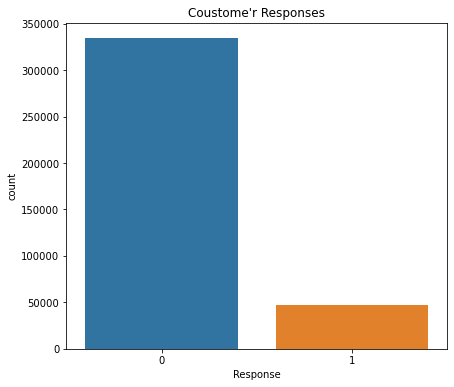

In [6]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data.Response)
plt.title("Coustome'r Responses")

In [7]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

#### we can see that the dataset is imbalanced people who have responded is less than who didnt respond 

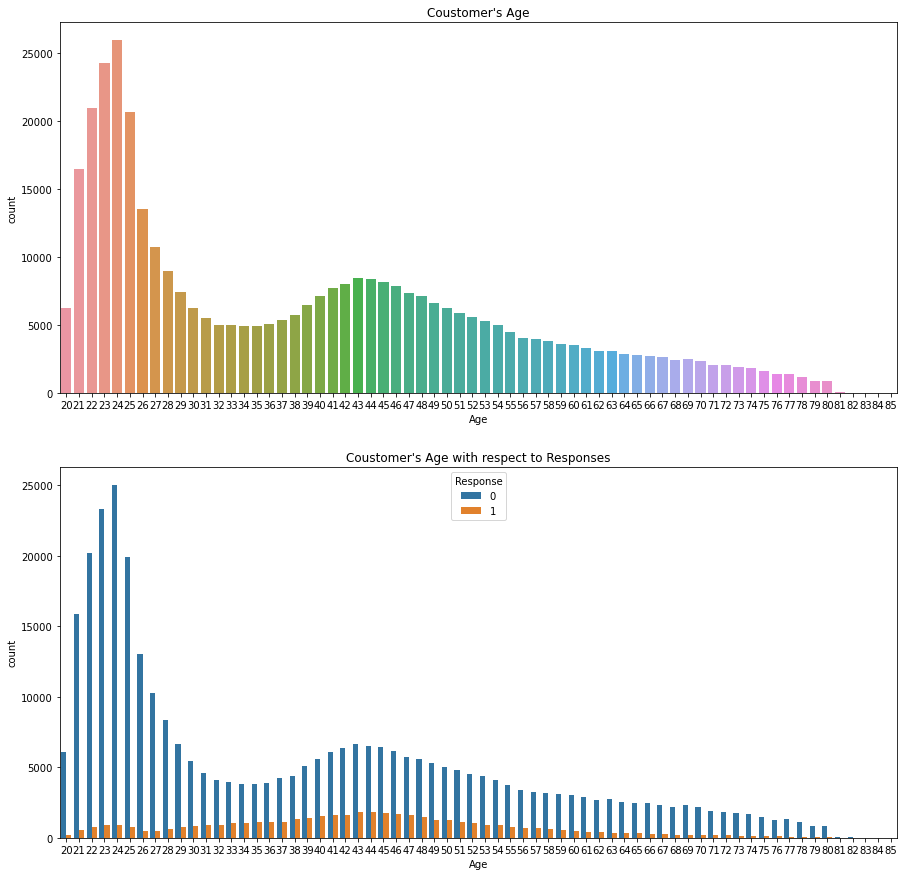

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.countplot(x="Age",data=data)
plt.title("Coustomer's Age")
plt.subplot(2,1,2)
sns.countplot(x="Age",hue="Response",data=data)
plt.title("Coustomer's Age with respect to Responses")
plt.show()

C:\Users\shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


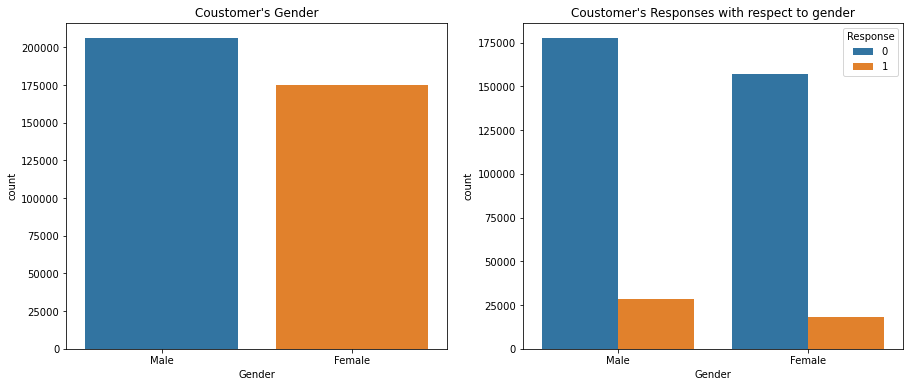

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data.Gender)
plt.title("Coustomer's Gender")
plt.subplot(1,2,2)
sns.countplot(x='Gender',hue='Response',data=data)
plt.title("Coustomer's Responses with respect to gender")
plt.show()

C:\Users\shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


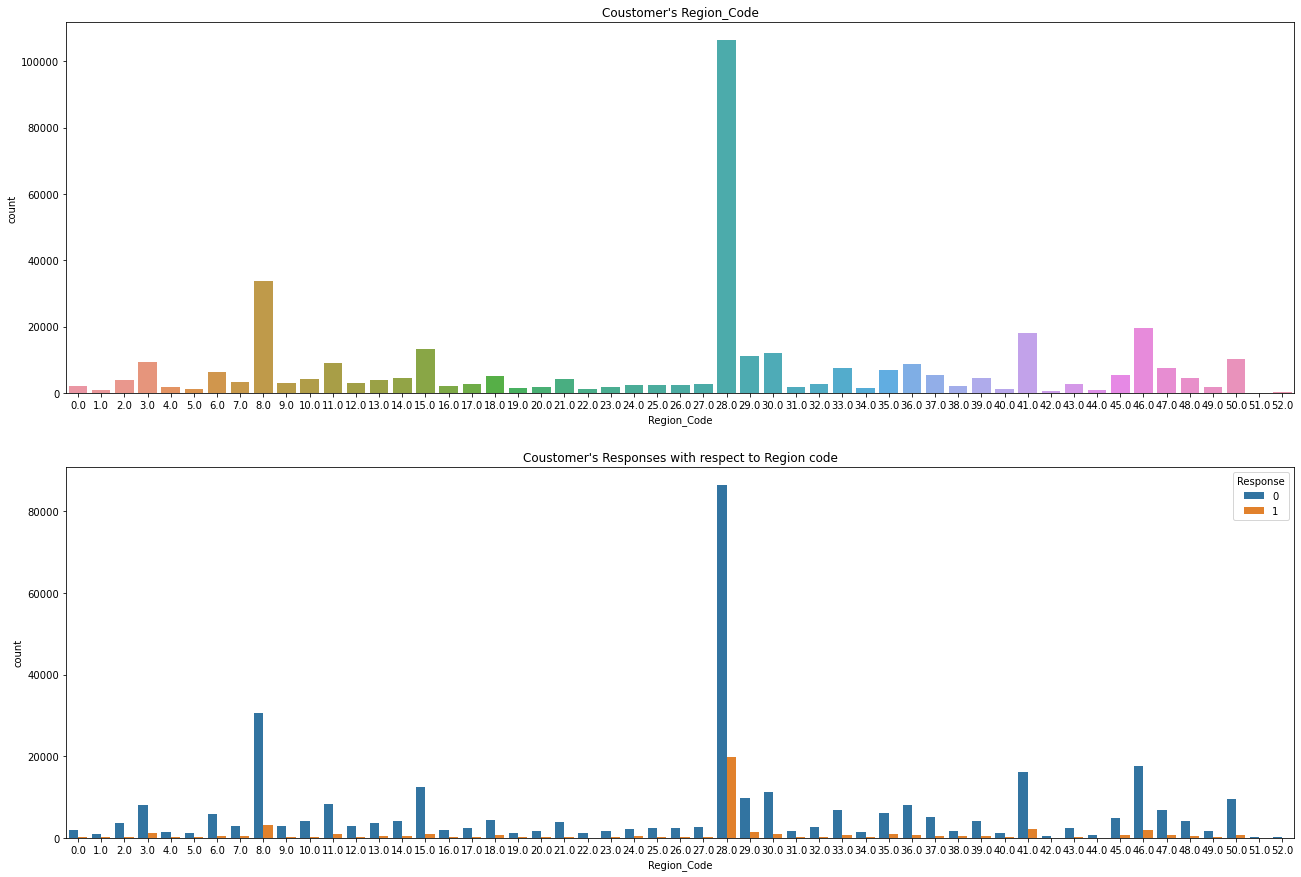

In [10]:
plt.figure(figsize=(22,15))
plt.subplot(2,1,1)
sns.countplot(data.Region_Code)
plt.title("Coustomer's Region_Code")
plt.subplot(2,1,2)
sns.countplot(x="Region_Code",hue="Response",data=data)
plt.title("Coustomer's Responses with respect to Region code")
plt.show()

C:\Users\shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


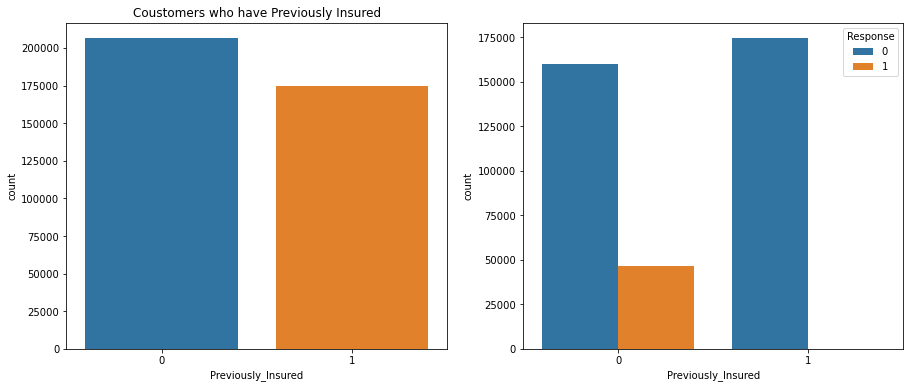

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data.Previously_Insured)
plt.title("Coustomers who have Previously Insured")
plt.subplot(1,2,2)
sns.countplot(x='Previously_Insured',hue='Response',data=data)
plt.show()

C:\Users\shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


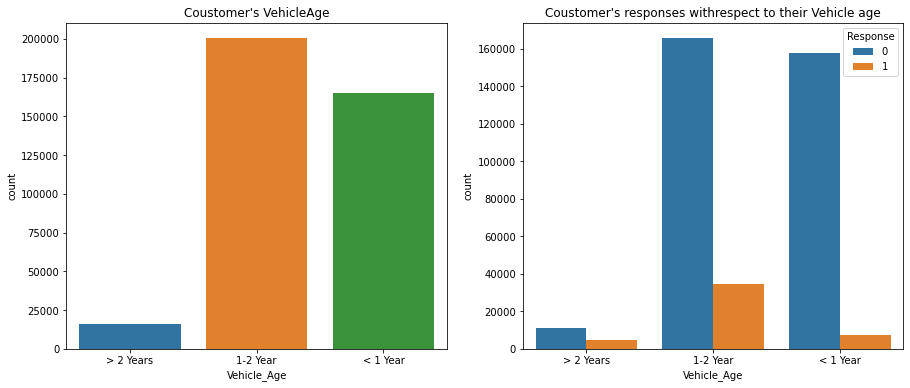

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data.Vehicle_Age)
plt.title("Coustomer's VehicleAge")
plt.subplot(1,2,2)
sns.countplot(x="Vehicle_Age",hue="Response",data=data)
plt.title("Coustomer's responses withrespect to their Vehicle age")
plt.show()

C:\Users\shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


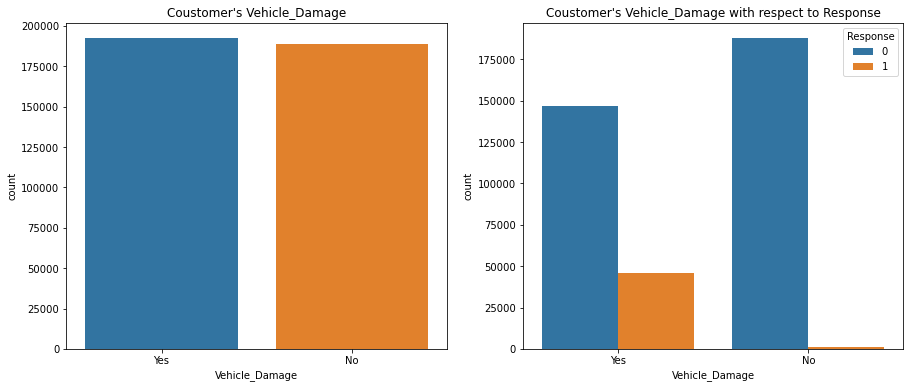

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data.Vehicle_Damage)
plt.title("Coustomer's Vehicle_Damage")
plt.subplot(1,2,2)
sns.countplot(x="Vehicle_Damage",hue='Response',data=data)
plt.title("Coustomer's Vehicle_Damage with respect to Response")
plt.show()

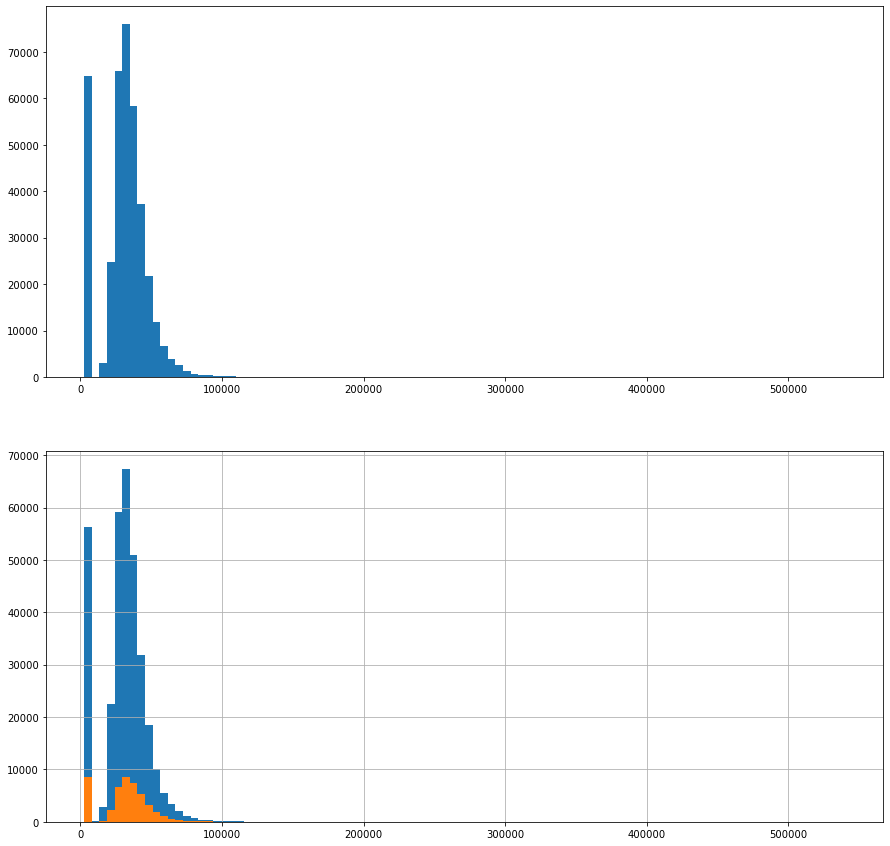

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.hist(x="Annual_Premium",data=data,bins=100)
plt.subplot(2,1,2)
data.groupby('Response').Annual_Premium.hist(bins=100)
plt.show()

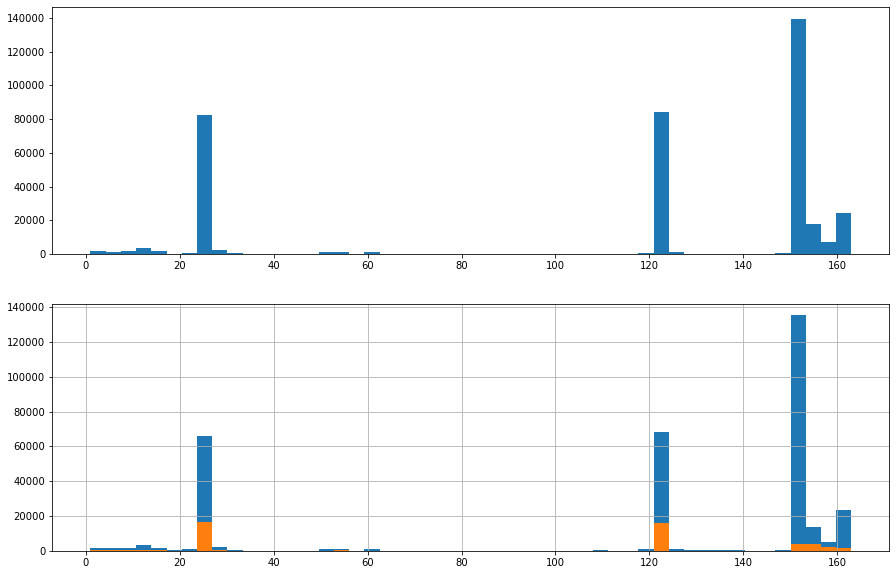

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(x="Policy_Sales_Channel",data=data,bins=50)
plt.subplot(2,1,2)
data.groupby("Response").Policy_Sales_Channel.hist(bins=50)
plt.show()

Text(0.5, 1.0, 'Vintage Distribution')

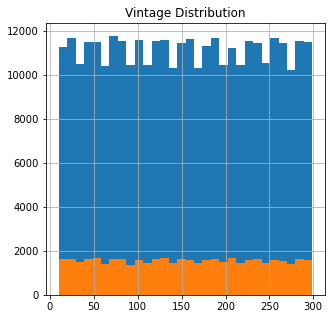

In [16]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
data.groupby('Response').Vintage.hist(bins=30)
plt.title("Vintage Distribution")

In [17]:
data.Region_Code.value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [18]:
data.Policy_Sales_Channel.value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [19]:
data.Vintage.value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

<AxesSubplot:xlabel='Annual_Premium', ylabel='Response'>

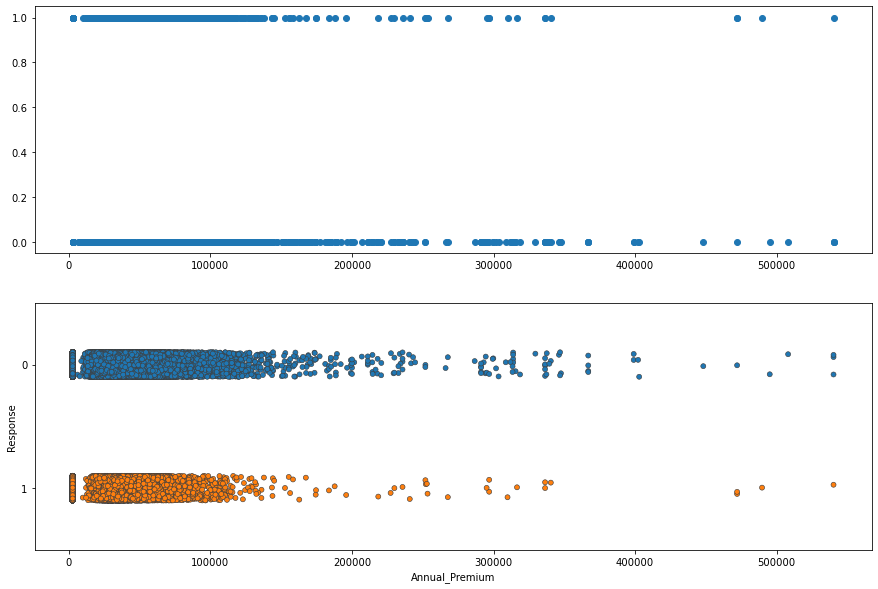

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(x="Annual_Premium",y="Response",data=data)
plt.subplot(2,1,2)
sns.stripplot(y = 'Response', x = 'Annual_Premium', data = data,linewidth = 0.6, orient = 'h')

<AxesSubplot:>

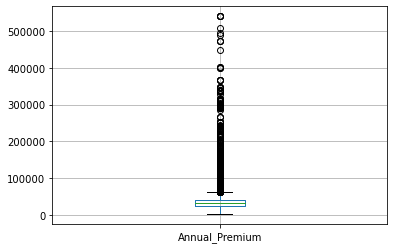

In [21]:
data.boxplot(column="Annual_Premium")

C:\Users\shashank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

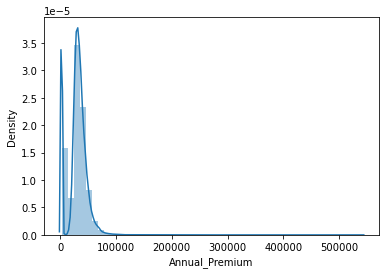

In [22]:
sns.distplot(data['Annual_Premium'])

In [23]:
IQR=data.Annual_Premium.quantile(0.75)-data.Annual_Premium.quantile(0.25)
lower_bridge=data['Annual_Premium'].quantile(0.25)-(IQR*3)
upper_bridge=data['Annual_Premium'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-20580.0
84385.0


(None, None)

<ipython-input-24-aacebf3b9d80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Annual_Premium[data.Annual_Premium > 84341.0] = 84341.0


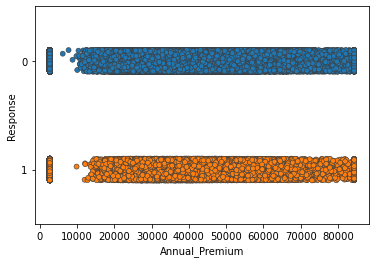

In [24]:
data.Annual_Premium[data.Annual_Premium > 84341.0] = 84341.0
sns.stripplot(y = 'Response', x = 'Annual_Premium', data = data,linewidth = 0.6, orient = 'h')
plt.show()

C:\Users\shashank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

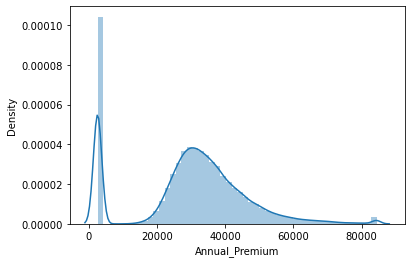

In [25]:
sns.distplot(data['Annual_Premium'])

In [26]:
data['Gender'][data['Gender'] == 'Male'] = 0
data['Gender'][data['Gender'] == 'Female'] = 1

data['Vehicle_Age'][data['Vehicle_Age'] == '< 1 Year'] = 0
data['Vehicle_Age'][data['Vehicle_Age'] == '1-2 Year'] = 1
data['Vehicle_Age'][data['Vehicle_Age'] == '> 2 Years'] = 2

data['Vehicle_Damage'][data['Vehicle_Damage'] == 'No'] = 0
data['Vehicle_Damage'][data['Vehicle_Damage'] == 'Yes'] = 1

<ipython-input-26-48f5a68f6860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'][data['Gender'] == 'Male'] = 0
<ipython-input-26-48f5a68f6860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'][data['Gender'] == 'Female'] = 1
<ipython-input-26-48f5a68f6860>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Vehicle_Age'][data['Vehicle_Age'] == '< 1 Year'] = 0
<ipython-input-26-48f5a68f6860>:5: SettingWit

In [27]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [28]:
data=data.drop(['id','Driving_License'],axis=1)

In [29]:
x=data.drop(['Response'], axis=1)
y=data['Response']

In [30]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os=RandomOverSampler(1.0)
X_ns,y_ns=os.fit_sample(x,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

C:\Users\shashank\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 334399, 1: 46710})
The number of classes after fit Counter({1: 334399, 0: 334399})


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X_ns,y_ns, test_size = 0.3, random_state=0)

In [32]:
import smote_variants as sv
from collections import Counter

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
X_train

array([[ 1.        , -0.96923077,  0.80769231, ..., -0.22541641,
         0.96296296, -0.88927336],
       [ 1.        , -0.44615385,  0.07692308, ..., -0.31673826,
         0.51851852, -0.48096886],
       [ 1.        , -0.78461538,  0.38461538, ..., -0.27299874,
         0.86419753,  0.46712803],
       ...,
       [ 1.        ,  0.10769231,  0.65384615, ..., -0.21139137,
         0.92592593,  0.51557093],
       [-1.        , -0.13846154,  0.07692308, ...,  0.09906867,
        -0.69135802,  0.46020761],
       [ 1.        , -0.90769231, -0.42307692, ..., -0.31343393,
         0.86419753, -0.50865052]])

In [35]:
import pickle
pickle.dump(scaling,open('min_max.pkl','wb'))

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve, precision_recall_curve,classification_report,mean_absolute_error, mean_squared_error

In [35]:
reg=LogisticRegression()

In [36]:
reg.fit(X_train,y_train)

LogisticRegression()

In [37]:
train_pred=reg.predict(X_train)

In [38]:
accuracy_score(y_train,train_pred)

0.7837909423741557

In [39]:
y_pred=reg.predict(X_test)

In [40]:
lr_probability =reg.predict_proba(X_test)[:,1]

In [41]:
accuracy_score(y_test,y_pred)

0.7839214513556619

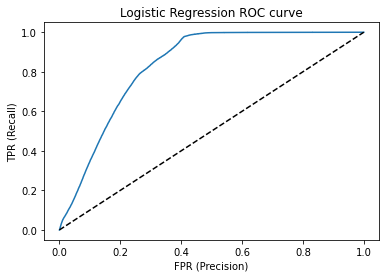

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [43]:
AUC_LR=roc_auc_score(y_pred,y_test)
AUC_LR

0.8340501758809484

In [44]:
classi_rep=classification_report(y_test,y_pred)
print(classi_rep)

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100328
           1       0.70      0.98      0.82    100312

    accuracy                           0.78    200640
   macro avg       0.83      0.78      0.78    200640
weighted avg       0.83      0.78      0.78    200640



[[59219 41109]
 [ 2245 98067]]


<AxesSubplot:>

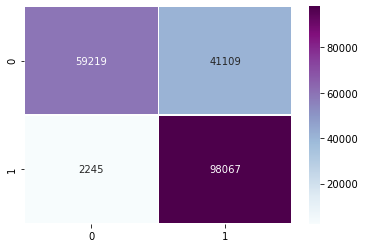

In [45]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,fmt='.0f', annot=True, linewidths=0.2,cmap='BuPu')

In [46]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train,y_train)
yrf_pred = randomforest.predict(X_test)
RF_probability = randomforest.predict_proba(X_test)[:,1]

In [47]:
accuracy_score(y_test,yrf_pred)

0.9400069776714514

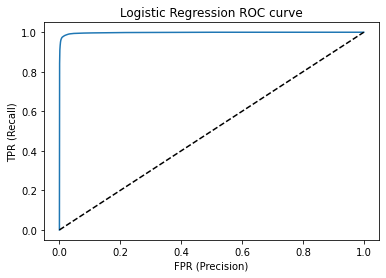

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [49]:
AUC_LR=roc_auc_score(yrf_pred,y_test)
AUC_LR

0.9457606456741775

In [50]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [51]:
classifier=RandomForestClassifier(n_jobs=-1)
param_grid={
    "n_estimators":[100,200,300,400,500],
    "max_depth":[1,3,5,7],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    "criterion":["gini","entropy"],
}

In [53]:
model1=RandomizedSearchCV(
estimator=classifier,
param_distributions=param_grid,
scoring="accuracy",
verbose=10,
n_jobs=-1,
cv=5)

In [54]:
model1.fit(X_train,y_train)
print(model1.best_score_)
print(model1.best_estimator_.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7956480522548437


NameError: name 'model' is not defined

In [55]:
print(model1.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [60]:
pred_h=model1.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_h)

In [50]:
import pickle
# open a file, where you ant to store the data
file = open('best_model.pkl', 'wb')

# dump information to that file
pickle.dump(randomforest, file)

In [51]:
import pickle
pickle.dump(randomforest,open('b_model.pkl','wb'))